In [1]:
!pip install pyPLNmodels

## pyPLNmodels

We assume the data comes from a PLN model:  $ \text{counts} \sim  \mathcal P(\exp(\text{Z}))$, where $Z$ are some unknown latent variables.


The goal of the package is to retrieve the latent variables $Z$ given the counts. To do so, one can instantiate a Pln or PlnPCA model, fit it and then extract the latent variables.  

### Import the needed functions

In [1]:
from pyPLNmodels import get_real_count_data, get_simulated_count_data, load_model, Pln, PlnPCA, PlnPCAcollection
import matplotlib.pyplot as plt

### Load the data

In [2]:
counts, labels  = get_real_count_data(return_labels=True) # np.ndarray

Returning dataset of size (469, 200)


### PLN model

In [3]:
pln = Pln(counts, add_const = True)
pln.fit()

Setting the offsets as the log of the sum of counts
Fitting a Pln model with full covariance model.
Initialization ...
Initialization finished
Tolerance 0.001 reached in 343 iterations


In [4]:
print(pln)

A multivariate Poisson Lognormal with full covariance model. 
     Loglike   Dimension    Nb param         BIC         AIC
  -172063.88         200       40200      295690      212263
* Useful properties
    .latent_variables, .model_parameters, .latent_parameters, .optim_parameters
* Useful methods
    .show(), .coef() .transform(), .sigma(), .predict(), .pca_projected_latent_variables(), .plot_pca_correlation_graph(), .viz(), .scatter_pca_matrix()
* Additional properties for Pln
    None
* Additional methods for Pln
    None


#### Once fitted, we can extract multiple variables:

In [5]:
gaussian = pln.latent_variables
print(gaussian.shape)

torch.Size([469, 200])


In [6]:
model_param = pln.model_parameters
print(model_param["coef"].shape)
print(model_param["covariance"].shape)

torch.Size([1, 200])
torch.Size([200, 200])


### PlnPCA model

In [7]:
pca = PlnPCA(counts, add_const = True, rank = 5)
pca.fit()

Setting the offsets as the log of the sum of counts
----------------------------------------------------------------------
Fitting a PlnPCAcollection model with 5 components
Initialization ...
Initialization finished
Tolerance 0.001 reached in 2902 iterations


In [8]:
print(pca)

A multivariate Poisson Lognormal with  5 principal component. 
     Loglike   Dimension    Nb param         BIC         AIC
  -264802.03         200        1190      268461      265992
* Useful properties
    .latent_variables, .model_parameters, .latent_parameters, .optim_parameters
* Useful methods
    .show(), .coef() .transform(), .sigma(), .predict(), .pca_projected_latent_variables(), .plot_pca_correlation_graph(), .viz(), .scatter_pca_matrix()
* Additional properties for PlnPCA
    .projected_latent_variables
* Additional methods for PlnPCA
     .projected_latent_variables


In [9]:
print(pca.latent_variables.shape)

torch.Size([469, 200])


In [10]:
print(pca.model_parameters["components"].shape)
print(pca.model_parameters["coef"].shape)

torch.Size([200, 5])
torch.Size([1, 200])


### One can save the model in order to load it back after:

In [11]:
pca.save()
dict_init = load_model("PlnPCA_nbcov_1_rank_5")
loaded_pca = PlnPCA(counts, add_const = True, dict_initialization=  dict_init)
print(loaded_pca)

Setting the offsets as the log of the sum of counts
A multivariate Poisson Lognormal with  5 principal component. 
     Loglike   Dimension    Nb param         BIC         AIC
  -264800.09         200        1190      268459      265990
* Useful properties
    .latent_variables, .model_parameters, .latent_parameters, .optim_parameters
* Useful methods
    .show(), .coef() .transform(), .sigma(), .predict(), .pca_projected_latent_variables(), .plot_pca_correlation_graph(), .viz(), .scatter_pca_matrix()
* Additional properties for PlnPCA
    .projected_latent_variables
* Additional methods for PlnPCA
     .projected_latent_variables


### One can fit multiple PCA and choose the best rank with BIC or AIC criterion

In [12]:
pca_col = PlnPCAcollection(counts, add_const = True, ranks = [5,15,25,40,50])
pca_col.fit()

Setting the offsets as the log of the sum of counts
----------------------------------------------------------------------
Fitting a PlnPCAcollection model with 5 components
Initialization ...
Initialization finished
Tolerance 0.001 reached in 2871 iterations
----------------------------------------------------------------------
Fitting a PlnPCAcollection model with 15 components
Initialization ...
Initialization finished
Tolerance 0.001 reached in 6305 iterations
----------------------------------------------------------------------
Fitting a PlnPCAcollection model with 25 components
Initialization ...
Initialization finished
Tolerance 0.001 reached in 5134 iterations
----------------------------------------------------------------------
Fitting a PlnPCAcollection model with 40 components
Initialization ...
Initialization finished
Tolerance 0.001 reached in 4695 iterations
----------------------------------------------------------------------
Fitting a PlnPCAcollection model with 50 c

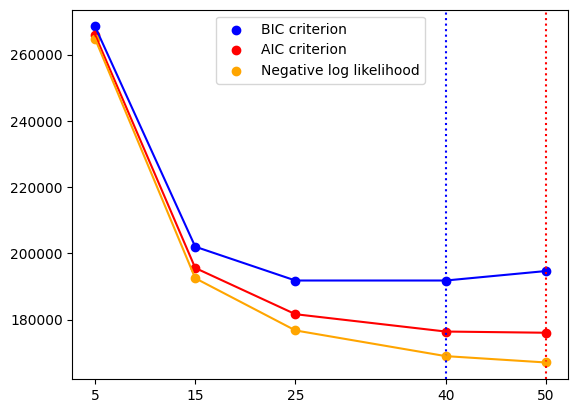

In [13]:
pca_col.show()

In [14]:
print(pca_col)


----------------------------------------------------------------------
Collection of 5 PlnPCAcollection models with                     200 variables.
----------------------------------------------------------------------
 - Ranks considered:[5, 15, 25, 40, 50]
 - BIC metric:
        rank           5          15          25          40          50
   criterion      268485      202026      191816      191814      194678

   Best model(lower BIC): 40
 
 - AIC metric:
        rank           5          15          25          40          50
   criterion      266015      195603      181647      176415      176053

   Best model(lower AIC): 50
----------------------------------------------------------------------
* Useful properties
    .BIC, .AIC, .loglikes
* Useful methods 
    .show(), .best_model()
----------------------------------------------------------------------



### One can extract the best model found (according to AIC or BIC criterion).

#### AIC best model

In [15]:
print(pca_col.best_model(criterion = "AIC"))

A multivariate Poisson Lognormal with  50 principal component. 
     Loglike   Dimension    Nb param         BIC         AIC
  -167078.03         200        8975      194678      176053
* Useful properties
    .latent_variables, .model_parameters, .latent_parameters, .optim_parameters
* Useful methods
    .show(), .coef() .transform(), .sigma(), .predict(), .pca_projected_latent_variables(), .plot_pca_correlation_graph(), .viz(), .scatter_pca_matrix()
* Additional properties for PlnPCA
    .projected_latent_variables
* Additional methods for PlnPCA
     .projected_latent_variables


#### BIC best model

In [16]:
print(pca_col.best_model(criterion = "BIC"))

A multivariate Poisson Lognormal with  40 principal component. 
     Loglike   Dimension    Nb param         BIC         AIC
  -168995.39         200        7420      191814      176415
* Useful properties
    .latent_variables, .model_parameters, .latent_parameters, .optim_parameters
* Useful methods
    .show(), .coef() .transform(), .sigma(), .predict(), .pca_projected_latent_variables(), .plot_pca_correlation_graph(), .viz(), .scatter_pca_matrix()
* Additional properties for PlnPCA
    .projected_latent_variables
* Additional methods for PlnPCA
     .projected_latent_variables


#### Visualization of the individuals (sites) with PCA on the latent variables.

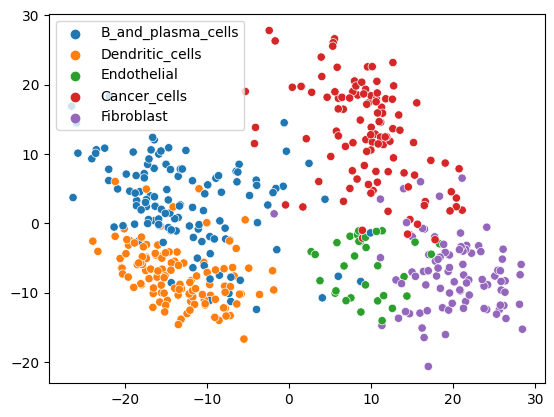

In [17]:
pln.viz(colors=labels)
plt.show()

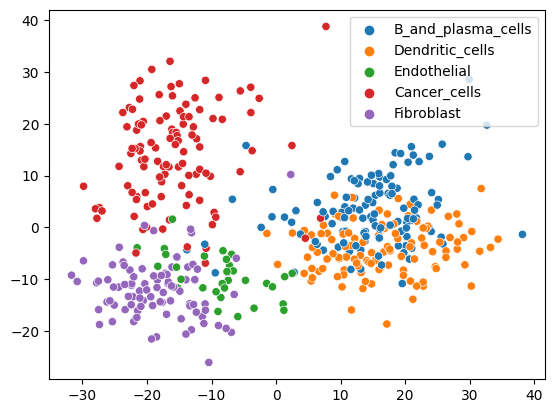

In [18]:
best_pca = pca_col.best_model()
best_pca.viz(colors = labels)
plt.show()

### What would give a PCA on the log normalize data ? 

In [19]:
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

<AxesSubplot: >

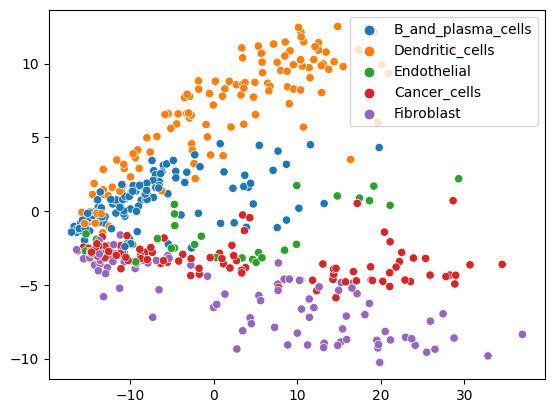

In [20]:
sk_pca = PCA(n_components = 2)
pca_log_counts = sk_pca.fit_transform(np.log(counts + (counts == 0)))
sns.scatterplot(x = pca_log_counts[:,0], y = pca_log_counts[:,1], hue = labels)

### Visualization of the variables

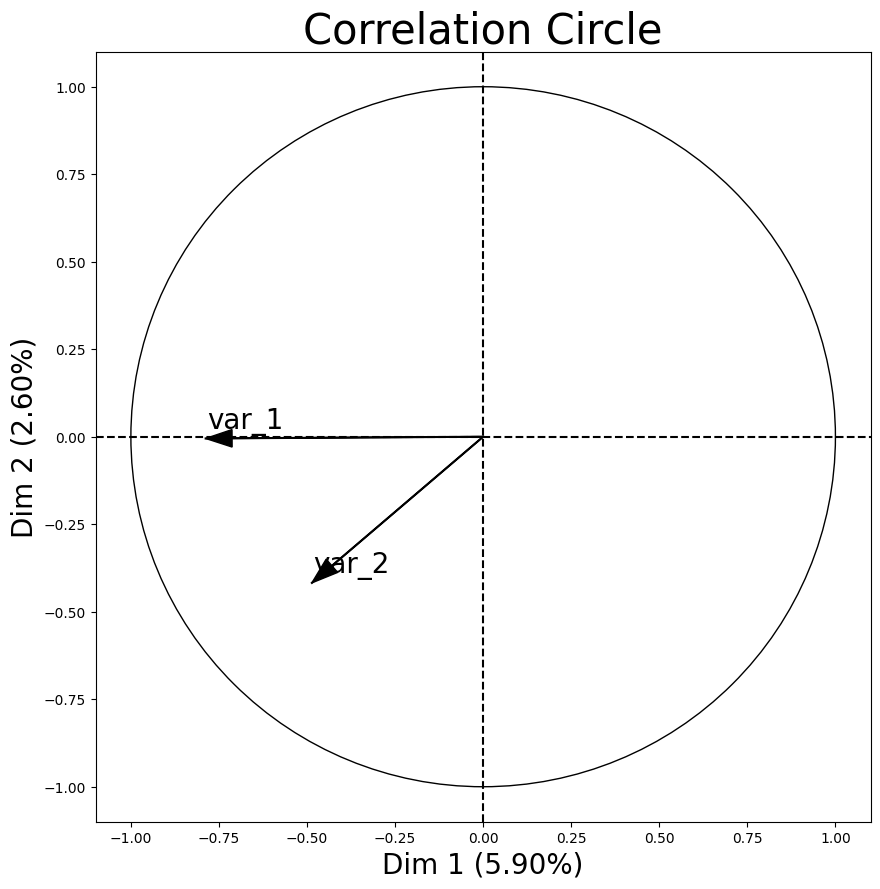

In [21]:
pln.plot_pca_correlation_graph(["var_1","var_2"], indices_of_variables = [0,1])
plt.show()

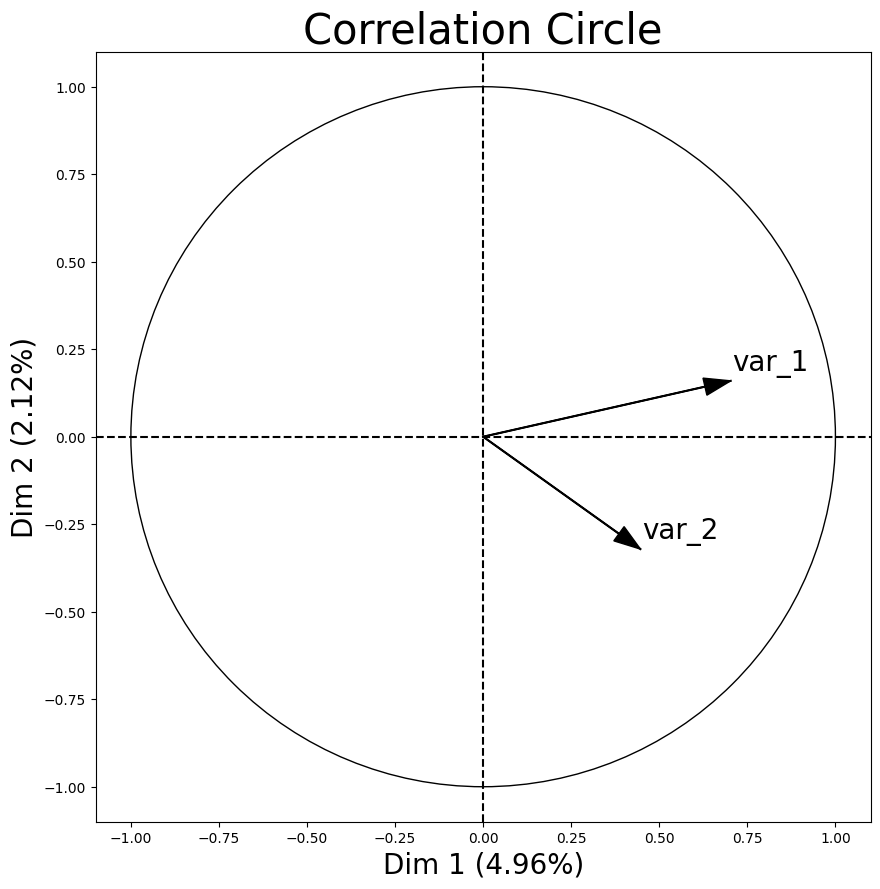

In [22]:
best_pca.plot_pca_correlation_graph(["var_1","var_2"], indices_of_variables = [0,1])
plt.show()

### Visualization of each components of the PCA


In [23]:
pln.scatter_pca_matrix(color = labels, n_components = 5)
plt.show()

In [24]:
best_pca.scatter_pca_matrix(color = labels, n_components = 6)
plt.show()